In [3]:
import pandas as pd
import numpy as np
import re

import nltk  # main NLP library
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
from nltk.stem import PorterStemmer, WordNetLemmatizer # perform stemming + lemmatization
from nltk.util import ngrams

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Word2Vec
from gensim.models import Word2Vec


In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Dataset
data = pd.read_csv("Amazon_Reviews.csv")
data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df = data[['Text']] #selecting the text column
df.dropna(inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21044\223656110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [7]:
#TASK 1-Data Preprocessing and Exploration
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocessing_text(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text) #remove url
    text = re.sub(r'[^a-zA-Z\s]', '', text) #remove special characters
    text = text.lower()
    words = text.split() #tokenize the words
    
    # remove stopwords
    words = [w for w in words if w not in stop_words]
    
    #apply stemming
    words = [stemmer.stem(w) for w in words]
    
    #apply lemmatization
    words = [lemmatizer.lemmatize(w) for w in words]
    
    #joining all the tokwns back into sentences
    return ' '.join(words)

df['cleaned_text'] = df['Text'].apply(preprocessing_text)
df.head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\DELL\AppData\Local\Temp\ipykernel_21044\2119266095.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['Text'].apply(preprocessing_text)


,Text,cleaned_text
0,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...
1,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanutsth peanu...
2,This is a confection that has been around a fe...,confect around centuri light pillowi citru gel...
3,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...
4,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...


Top 20 Unigrams are: [('like', 283983), ('br', 272679), ('tast', 256704), ('flavor', 212404), ('good', 199760), ('one', 189299), ('love', 186806), ('product', 178241), ('use', 174269), ('coffe', 170129), ('tri', 166421), ('great', 163707), ('tea', 148960), ('food', 147859), ('get', 139935), ('make', 124675), ('would', 123366), ('dog', 105879), ('buy', 105748), ('eat', 105121)]


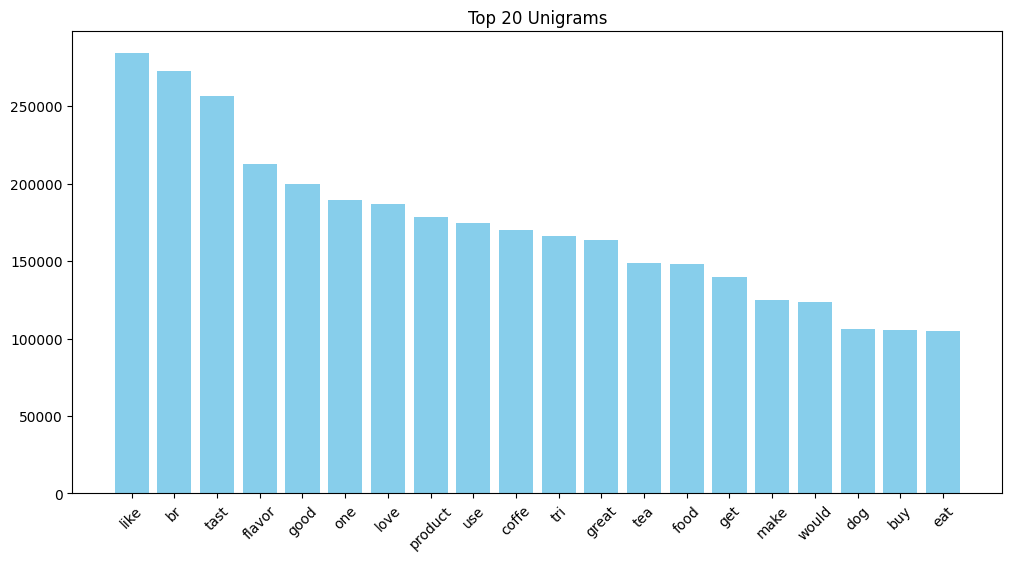

In [8]:
#Task1 - Ngrams
from collections import Counter
#UNigrams
all_text = ' '.join(df['cleaned_text'].astype(str)) #this joins the cleaned text(all) into a long string
tokens = all_text.split() #above long text split by spaces

unigram_counts = Counter(tokens) #counting unigrams
top_20_unigrams = unigram_counts.most_common(20)
print(f'Top 20 Unigrams are: {top_20_unigrams}')

#ploting top 20 unigrams:
words, counts = zip(*top_20_unigrams) #sepsrate word and count for plotting
plt.figure(figsize=(12,6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Unigrams")
plt.show()


Top 20 Bigrams are : [(('tast', 'like'), 30564), (('highli', 'recommend'), 18967), (('groceri', 'store'), 16213), (('tast', 'good'), 15301), (('dog', 'food'), 14722), (('tast', 'great'), 14658), (('green', 'tea'), 13847), (('peanut', 'butter'), 13682), (('ive', 'tri'), 13135), (('dog', 'love'), 12284), (('realli', 'like'), 11813), (('much', 'better'), 11133), (('gluten', 'free'), 11097), (('year', 'old'), 10777), (('cat', 'food'), 10690), (('cup', 'coffe'), 10299), (('dont', 'know'), 10047), (('great', 'product'), 9466), (('realli', 'good'), 9108), (('great', 'tast'), 9072)]


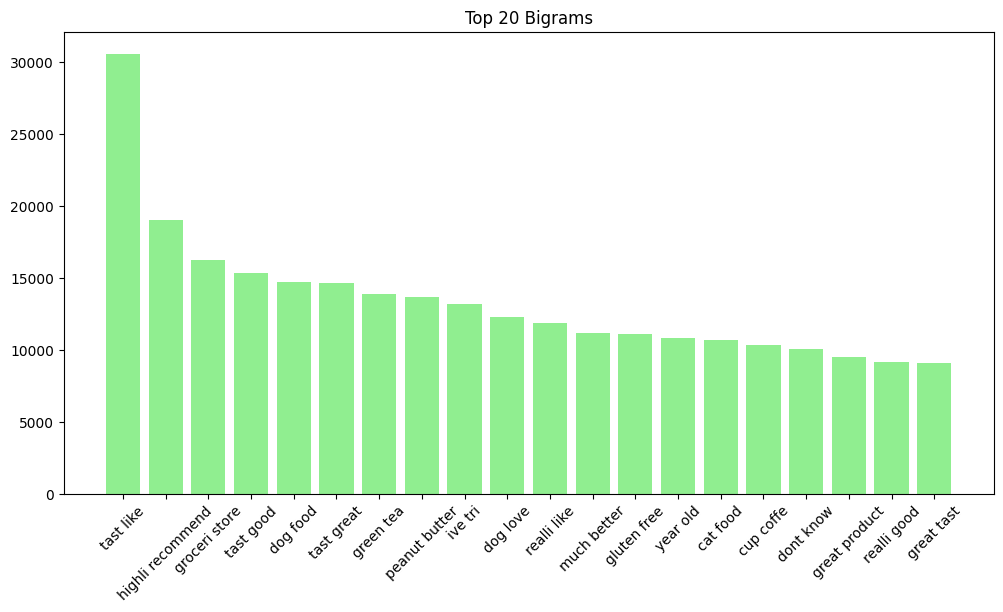

In [9]:
#Bigrams
bigrams = list(ngrams(tokens, 2)) #create pairs of consecutive words
bigram_count = Counter(bigrams)
top_20_bigrams = bigram_count.most_common(20) 
print(f"Top 20 Bigrams are : {top_20_bigrams}")

bigram_words = [' '.join(b) for b, _ in top_20_bigrams] #turn the bigram tuple into one string 
bigram_values = [count for _, count in top_20_bigrams]#_ignore the count

plt.figure(figsize=(12,6))
plt.bar(bigram_words, bigram_values, color='lightgreen')
plt.xticks(rotation=45)
plt.title("Top 20 Bigrams")
plt.show()

Top 20 Trigrams are : [(('local', 'groceri', 'store'), 3973), (('health', 'food', 'store'), 2369), (('highli', 'recommend', 'product'), 2072), (('would', 'highli', 'recommend'), 2023), (('high', 'fructos', 'corn'), 1773), (('fructos', 'corn', 'syrup'), 1671), (('cant', 'go', 'wrong'), 1577), (('br', 'highli', 'recommend'), 1556), (('last', 'long', 'time'), 1458), (('goe', 'long', 'way'), 1373), (('dog', 'love', 'treat'), 1320), (('would', 'recommend', 'anyon'), 1301), (('love', 'love', 'love'), 1251), (('chocol', 'chip', 'cooki'), 1246), (('bob', 'red', 'mill'), 1234), (('would', 'definit', 'recommend'), 1225), (('tast', 'pretti', 'good'), 1205), (('decid', 'give', 'tri'), 1204), (('tast', 'much', 'better'), 1196), (('doesnt', 'tast', 'like'), 1158)]


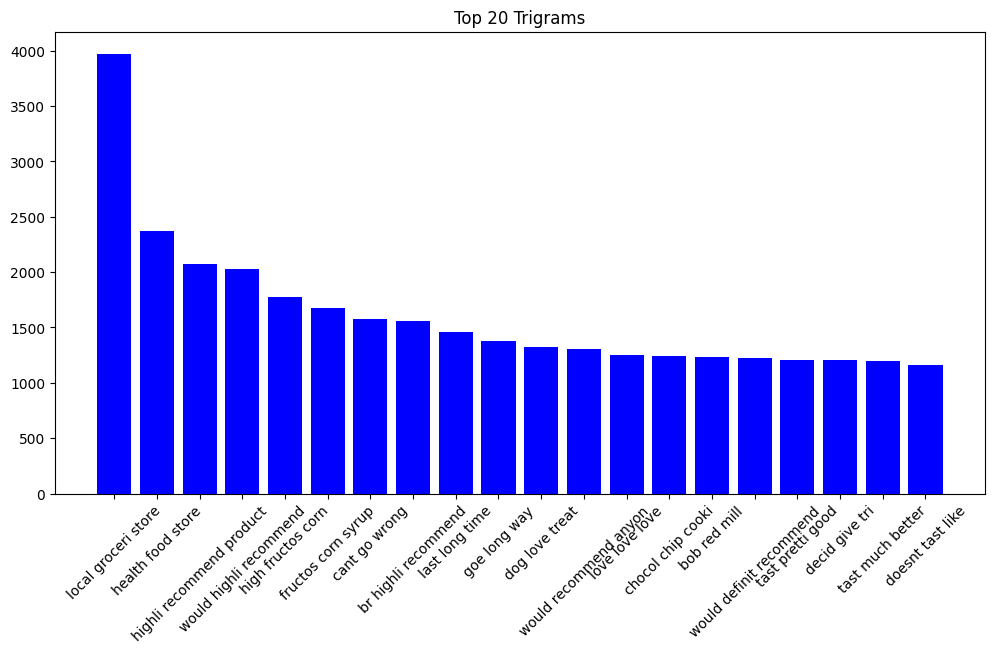

In [10]:
#trigrams
trigrams = list(ngrams(tokens, 3)) #tuple of 3 consecutive words
trigram_count = Counter(trigrams)
top_20_trigrams = trigram_count.most_common(20) 
print(f"Top 20 Trigrams are : {top_20_trigrams}")

trigram_words = [' '.join(t) for t, _ in top_20_trigrams] #turn the bigram tuple into one string 
trigram_values = [count for _, count in top_20_trigrams]#_ignore the count

plt.figure(figsize=(12,6))
plt.bar(trigram_words, trigram_values, color='blue')
plt.xticks(rotation=45)
plt.title("Top 20 Trigrams")
plt.show()

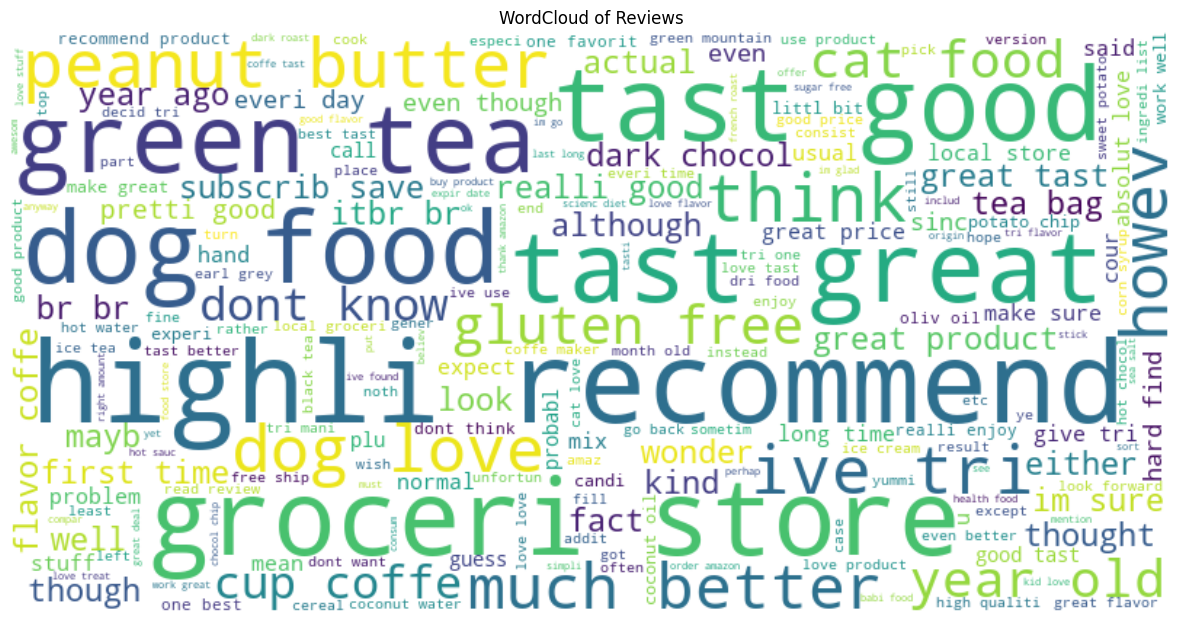

In [ ]:
#Wordcloud Display

wordcloud= WordCloud(width=800, height=400, background_color='white').generate(all_text)
#imp: it gives the the large display to frequent words and small to rare
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Reviews")
plt.show()

In [11]:
# TASK 2-Implementing TF-IDF Based Similarity
#Tfidf matrix vectors
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_vectors = vectorizer.fit_transform(df['cleaned_text'])

print(f"TFidk generated: matrix shape : {tfidf_vectors.shape}")

TFidk generated: matrix shape : (568454, 5000)


In [12]:
#cosine similarity
def top_similar_text(query, vectorizer, tfidf_vectors, n = 5):
    #now it returns the top 5 similar documents 
    cleaned = preprocessing_text(query)
    #TF-IDF vectors
    query_tfidfvector = vectorizer.transform([cleaned])
    
    similarity_scores = cosine_similarity(query_tfidfvector, tfidf_vectors)  #with all documents
    similarity_scores = similarity_scores.flatten()
    
    #indices of top_n most similar documents
    top_indices = similarity_scores.argsort()[-n:][::-1]
    top_texts = df['Text'].iloc[top_indices].values
    top_scores = similarity_scores[top_indices]
    
    return list(zip(top_texts, top_scores))
    

user_input = "Fast charging and long-lasting battery"
top_results = top_similar_text(user_input, vectorizer, tfidf_vectors, n=5)

for i, (text, score) in enumerate(top_results, 1):
    print(f"Rank {i}: (Score: {score:.3f})\n{text}\n")


Rank 1: (Score: 0.588)
This product was received very fast.<br /><br />I ordered 4 pieces and was charged only 1 shipping and handling charge.

Rank 2: (Score: 0.505)
every thing was perfect, but only thing i didn't understand i charged more than actual pries,here in EU charge you exact pries. thanks

Rank 3: (Score: 0.499)
What more can I say???  Phenominal!  Greta packing/shipping and fast!

Rank 4: (Score: 0.491)
Before you by the combo mixes at this price, Toys R US only charges 12.99 plus tax.  Why are you charging so much over retail?

Rank 5: (Score: 0.474)
Wonderful to be able to recieve these special cookies so fast. I appreciate Amazon, even they they should not charge so much for shipping.



In [29]:
# TASK3- WORD2VEC
#Tokensize all docs
documents_tokens = []  # empty list to store token lists

for text in df['cleaned_text']:
    tokens = text.split()  # split text by whitespace into words
    documents_tokens.append(tokens)  # add to main list

#training w2v and cow model:
# CBOW model
w2v_cbow = Word2Vec(
    sentences=documents_tokens,
    vector_size=100, 
    window=5,        
    min_count=2,     
    sg=0,  # CBOW
    workers=4
)

# Skip-gram model
w2v_sg = Word2Vec(
    sentences=documents_tokens,
    vector_size=100,
    window=5,
    min_count=2,
    sg=1,    # Skip-gram
    workers=4
)



In [30]:
#convert all documnents to vector
def document_vector(model, tokens):
    valid_words = [word for word in tokens if word in model.wv]
    if not valid_words:
        return np.zeros(model.vector_size)
    #mean of word vectors
    return np.mean(model.wv[valid_words], axis=0)

#CBOW
doc_vectors_cbow = np.array([document_vector(w2v_cbow, tokens) for tokens in documents_tokens])

#Skip-gram
doc_vectors_sg = np.array([document_vector(w2v_sg, tokens) for tokens in documents_tokens])


In [33]:

def recommend_w2v(query, model, doc_vectors, top_n=5):
    query_tokens = preprocessing_text(query).split()
    #average embedding
    query_vector = document_vector(model, query_tokens).reshape(1, -1)
    similarity_scores = cosine_similarity(query_vector, doc_vectors).flatten()
    
    top_indices = similarity_scores.argsort()[-top_n:][::-1]
    top_texts = df['Text'].iloc[top_indices].values
    top_scores = similarity_scores[top_indices]
    
    return list(zip(top_texts, top_scores))



In [34]:
nltk.download('punkt')

user_query = "Fast charging and long-lasting battery"

# CBOW recommendations
top_cbow = recommend_w2v(user_query, w2v_cbow, doc_vectors_cbow)

# Skip-gram recommendations
top_sg = recommend_w2v(user_query, w2v_sg, doc_vectors_sg)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
print("CBOW Recommendations:")
for i, (text, score) in enumerate(top_cbow, 1):
    print(f"{i}. ({score:.3f}) {text}")

print("\nSkip-gram Recommendations:")
for i, (text, score) in enumerate(top_sg, 1):
    print(f"{i}. ({score:.3f}) {text}")


CBOW Recommendations:
1. (0.728) Fast response - fast shipping - product exactly as advertized.
2. (0.676) no more stress looking for this item in the stores!!!<br />We will order it thru amazon.com from now on, fast service,<br />fast delievery, good price..what more could we want?
3. (0.667) received item within 48 hours of placing order...that's fast!  The price was right and I love the product!  Win win situation!!
4. (0.648) The price is cheap, the order processed was so fast, and it took 3-4 days to get the products, plus free shipping ... I felt its so convinent to buy products from amazon.
5. (0.645) This item was shipped fast and was very good...thanks so much for the fast shipment and product described as is

Skip-gram Recommendations:
1. (0.820) I think the price is good since there is no shipping fee or taxes.  The shake does hold me up to 4 hours.
2. (0.810) Total rip off.  The shipping and handling for this was $14.79!!! Total price was over $30 dollars. I am so glad I di